# Network science and Graph Learning
$Rémi\ Khoury$
## Final project

In [1]:
# necessary imports
import os
import networkx as nx
import matplotlib.pyplot as plt

# 1. Social Network Analysis with the Facebook100 Dataset
Lets use three networks from the FB100: Caltech (with 762 nodes in the LCC), MIT (which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes in the LCC).

In [21]:
# load the networks

Caltech = nx.read_gml("data/Caltech36.gml")
Mit = nx.read_gml("data/MIT8.gml")
Johns_Hopkins = nx.read_gml("data/Johns Hopkins55.gml")

titles = ["MIT", "Johns_Hopkins", "Caltech"]
networks_exemples = [Mit, Johns_Hopkins, Caltech]

(a) plot the degree distribution for each of the three networks

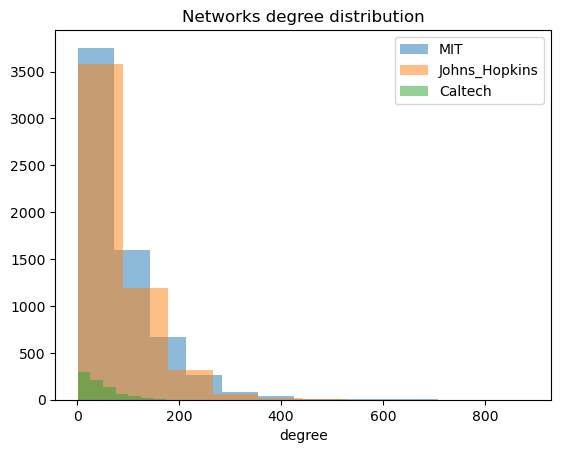

In [22]:
def plot_degree_dist(networks, titles):
    for i, g in enumerate(networks):
        degrees = [g.degree(n) for n in g.nodes()]
        plt.hist(degrees,  alpha = 0.5, label=titles[i])
        plt.legend()
    plt.xlabel("degree")
    plt.title("Networks degree distribution")
    plt.show()

plot_degree_dist(networks_exemples, titles)

(b) Compute the global clustering coefficient and mean local clustering coefficient for each of the 3 networks. In addition compute the edge density of each network

In [23]:
for i, g in enumerate(networks_exemples):
    print(f"For {titles[i]} network :")
    print(f"The global clustering coeff is {nx.transitivity(g):0.2f}")
    print(f"The average clustering coeff is {nx.average_clustering(g):0.2f}")
    print(f"The density is {nx.density(g):0.2f} \n")

For MIT network :
The global clustering coeff is 0.18
The average clustering coeff is 0.27
The density is 0.01 

For Johns_Hopkins network :
The global clustering coeff is 0.19
The average clustering coeff is 0.27
The density is 0.01 

For Caltech network :
The global clustering coeff is 0.29
The average clustering coeff is 0.41
The density is 0.06 



(c) For each network, also draw a scatter plot of the degree versus local clustering coefficient.

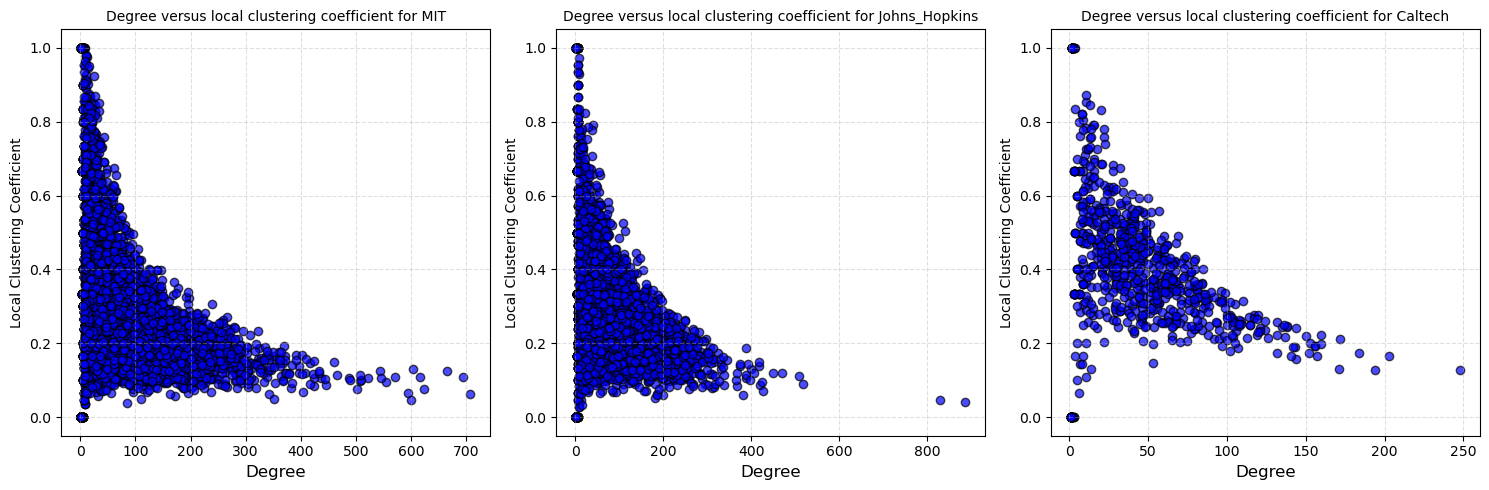

In [133]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

for i, g in enumerate(networks_exemples):
    degrees = list(dict(g.degree()).values())
    clustering = list(nx.clustering(g).values())
    axis[i].scatter(degrees, clustering, c='blue', alpha=0.7, edgecolors='k')
    axis[i].set_title(f"Degree versus local clustering coefficient for {titles[i]}", fontsize=10)
    axis[i].set_xlabel("Degree", fontsize=12)
    axis[i].set_ylabel("Local Clustering Coefficient")
    axis[i].grid(True, linestyle='--', alpha=0.4)
    

plt.tight_layout()
plt.show()

# 2. Assortativity Analysis with the Facebook100 Dataset
In this question we expect you will compute the assortativity on a large set of graphs (if possible all the graphs).

Of the FB100 networks, investigate the assortativity patterns for five vertex attributes: 
- (i) student/faculty status
- (ii) major 
- (iii) vertex degree 
- (iiii) dorm
- (iiiii) gender

In [10]:
# necessary imports
import pandas as pd
import numpy as np
from tqdm import tqdm

In [6]:
# load the graphs
networks = {}
gml_files = [f for f in os.listdir("data") if f.endswith(".gml")]

for file_name in tqdm(gml_files, desc="Loading networks", unit="network"):
    network_name = file_name.split(".gml")[0]
    file_path = os.path.join("data", file_name)

    networks[network_name] = nx.read_gml(file_path)

Loading networks: 100%|██████████| 100/100 [18:14<00:00, 10.95s/network]


In [39]:
# define the function calculating assortivity
def assortativity(G, attribute):
    return nx.attribute_assortativity_coefficient(G, attribute)

In [40]:
# define a dataframe to store the results
facebook100_df = pd.DataFrame(columns=['Network', 'Size', 'Attribute', 'Assortativity'])
Attributes = ["student_fac", 'major_index', 'dorm', 'gender']

# Fill the dataframe 
for network_name, net in tqdm(networks.items(), desc="Processing Networks", unit="network"):
    size = len(net)
    for attr in Attributes:
        line = pd.DataFrame(
            {
                "Network": network_name,
                "Size": size,
                "Attribute": attr,
                "Assortativity": assortativity(net, attr),
            },
            index=[0]
        )     
        facebook100_df = pd.concat([facebook100_df, line], ignore_index=True)

    line = pd.DataFrame(
        {
            "Network": network_name,
            "Size": size,
            "Attribute": 'degree',
            "Assortativity": nx.assortativity.degree_assortativity_coefficient(net),
        },
        index=[0]
    )     
    facebook100_df = pd.concat([facebook100_df, line], ignore_index=True)   


Processing Networks:   0%|          | 0/100 [00:00<?, ?network/s]C:\Users\Rémi\AppData\Local\Temp\ipykernel_7064\886043456.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  facebook100_df = pd.concat([facebook100_df, line], ignore_index=True)
Processing Networks: 100%|██████████| 100/100 [03:38<00:00,  2.18s/network]


In [43]:
facebook100_df = facebook100_df.sort_values(by='Size')
facebook100_df.head()

,Network,Size,Attribute,Assortativity
65,Caltech36,769,student_fac,0.244079
66,Caltech36,769,major_index,0.034719
67,Caltech36,769,dorm,0.349153
68,Caltech36,769,gender,0.046331
69,Caltech36,769,degree,-0.065273


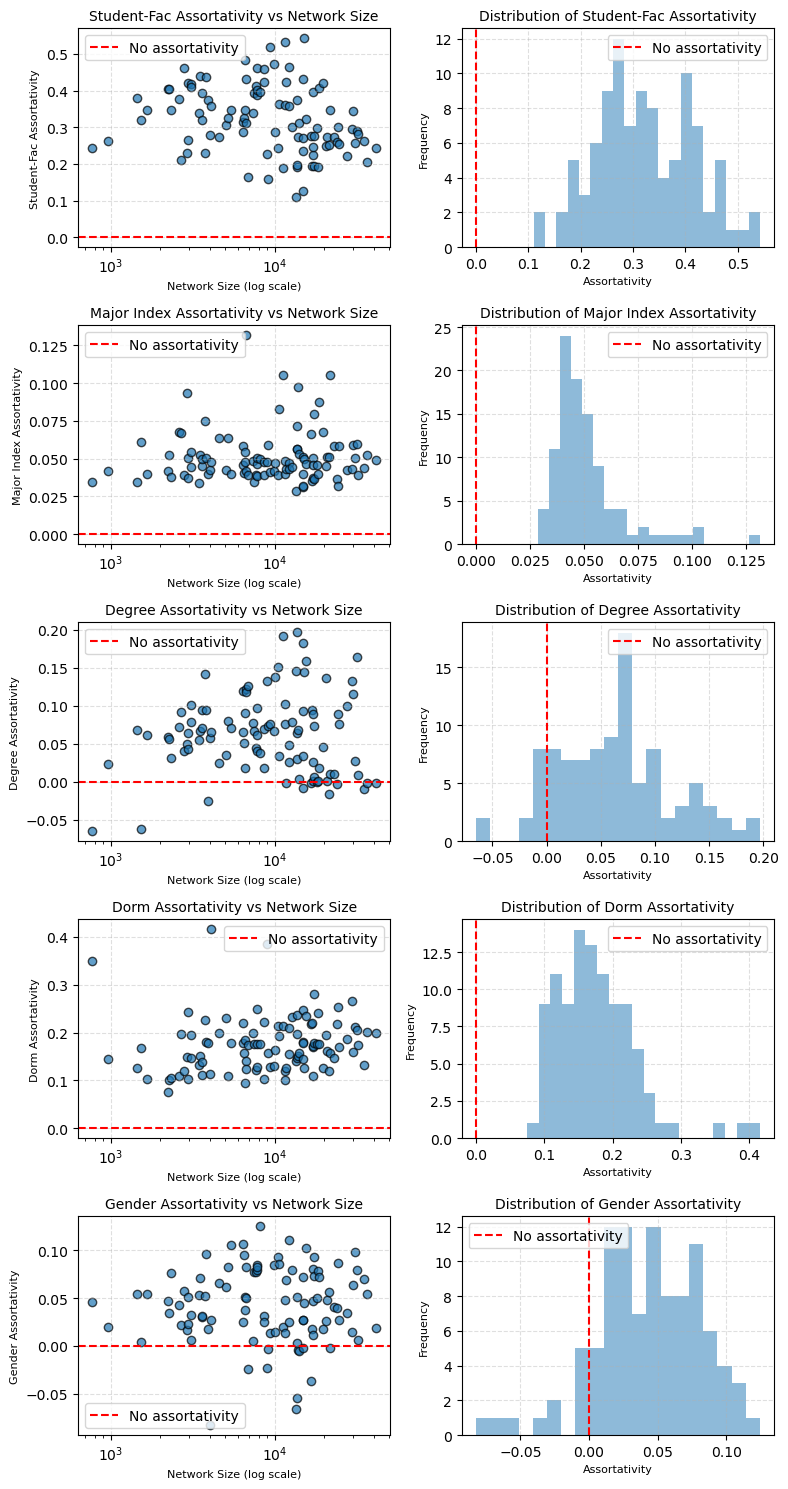

In [ ]:
# Plot the figures
fig, axis = plt.subplots(5, 2, figsize=(8, 15))

# Plot for student-fac assortativity
student_fac_df = facebook100_df[facebook100_df['Attribute'] == 'student_fac']

# Scatter plot for student-fac assortativity vs network size
ax = axis[0, 0]
ax.scatter(student_fac_df['Size'], student_fac_df['Assortativity'], alpha=0.7, edgecolors='k')
ax.set_xscale('log')
ax.set_title('Student-Fac Assortativity vs Network Size', fontsize=10)
ax.set_xlabel('Network Size (log scale)', fontsize=8)
ax.set_ylabel('Student-Fac Assortativity', fontsize=8)
ax.axhline(0, color='red', linestyle='--', label='No assortativity')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend()

# Histogram for student-fac assortativity
ax = axis[0, 1]
ax.hist(student_fac_df['Assortativity'], alpha=0.5, bins=20)
ax.axvline(0, color='red', linestyle='--', label='No assortativity')
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_title('Distribution of Student-Fac Assortativity', fontsize=10)
ax.set_xlabel('Assortativity', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
ax.legend()

# Plot for major_index assortativity
major_index_df = facebook100_df[facebook100_df['Attribute'] == 'major_index']

# Scatter plot for major_index assortativity vs network size
ax = axis[1, 0]
ax.scatter(major_index_df['Size'], major_index_df['Assortativity'], alpha=0.7, edgecolors='k')
ax.set_xscale('log')
ax.set_title('Major Index Assortativity vs Network Size', fontsize=10)
ax.set_xlabel('Network Size (log scale)', fontsize=8)
ax.set_ylabel('Major Index Assortativity', fontsize=8)
ax.axhline(0, color='red', linestyle='--', label='No assortativity')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend()

# Histogram for major_index assortativity
ax = axis[1, 1]
ax.hist(major_index_df['Assortativity'], alpha=0.5, bins=20)
ax.axvline(0, color='red', linestyle='--', label='No assortativity')
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_title('Distribution of Major Index Assortativity', fontsize=10)
ax.set_xlabel('Assortativity', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
ax.legend()

# Plot for degree assortativity
degree_df = facebook100_df[facebook100_df['Attribute'] == 'degree']

# Scatter plot for degree assortativity vs network size
ax = axis[2, 0]
ax.scatter(degree_df['Size'], degree_df['Assortativity'], alpha=0.7, edgecolors='k')
ax.set_xscale('log')
ax.set_title('Degree Assortativity vs Network Size', fontsize=10)
ax.set_xlabel('Network Size (log scale)', fontsize=8)
ax.set_ylabel('Degree Assortativity', fontsize=8)
ax.axhline(0, color='red', linestyle='--', label='No assortativity')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend()

# Histogram for degree assortativity
ax = axis[2, 1]
ax.hist(degree_df['Assortativity'], alpha=0.5, bins=20)
ax.axvline(0, color='red', linestyle='--', label='No assortativity')
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_title('Distribution of Degree Assortativity', fontsize=10)
ax.set_xlabel('Assortativity', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
ax.legend()

# Plot for dorm assortativity
dorm_df = facebook100_df[facebook100_df['Attribute'] == 'dorm']

# Scatter plot for dorm assortativity vs network size
ax = axis[3, 0]
ax.scatter(dorm_df['Size'], dorm_df['Assortativity'], alpha=0.7, edgecolors='k')
ax.set_xscale('log')
ax.set_title('Dorm Assortativity vs Network Size', fontsize=10)
ax.set_xlabel('Network Size (log scale)', fontsize=8)
ax.set_ylabel('Dorm Assortativity', fontsize=8)
ax.axhline(0, color='red', linestyle='--', label='No assortativity')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend()

# Histogram for dorm assortativity
ax = axis[3, 1]
ax.hist(dorm_df['Assortativity'], alpha=0.5, bins=20)
ax.axvline(0, color='red', linestyle='--', label='No assortativity')
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_title('Distribution of Dorm Assortativity', fontsize=10)
ax.set_xlabel('Assortativity', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
ax.legend()

# Plot for gender assortativity
gender_df = facebook100_df[facebook100_df['Attribute'] == 'gender']

# Scatter plot for gender assortativity vs network size
ax = axis[4, 0]
ax.scatter(gender_df['Size'], gender_df['Assortativity'], alpha=0.7, edgecolors='k')
ax.set_xscale('log')
ax.set_title('Gender Assortativity vs Network Size', fontsize=10)
ax.set_xlabel('Network Size (log scale)', fontsize=8)
ax.set_ylabel('Gender Assortativity', fontsize=8)
ax.axhline(0, color='red', linestyle='--', label='No assortativity')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend()

# Histogram for gender assortativity
ax = axis[4, 1]
ax.hist(gender_df['Assortativity'], alpha=0.5, bins=20)
ax.axvline(0, color='red', linestyle='--', label='No assortativity')
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_title('Distribution of Gender Assortativity', fontsize=10)
ax.set_xlabel('Assortativity', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
ax.legend()

plt.tight_layout()
plt.show()


# 3. Link prediction
In this question we expect you will compute the link prediction algorithms on a large set of graphs (> 10).

In [ ]:
# necessary imports
from abc import ABC
from abc import abstractmethod

1. Implement the metrics

In [55]:
# define the class on which our metrics will inherit
class LinkPrediction ( ABC ) :
    def __init__ ( self , graph ) :
        """
        Constructor

        Parameters
        ----------
        graph : Networkx graph
        """
        self . graph = graph
        self . N = len ( graph )

    def neighbors ( self , v ) :
        """
        Return the neighbors list of a node

        Parameters
        ----------
        v: int
        node id

        Return
        ------
        neighbors_list : python list
        """
        neighbors_list = self . graph . neighbors ( v )
        return list ( neighbors_list )

    @abstractmethod
    def fit (self) :
        raise NotImplementedError (" Fit must be implemented ")

(a) CommonNeighbors

In [56]:
# Implement the common neightbors metric
class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors, self).__init__(graph)
        
    def fit(self):
        """
        Fit the model and calculate common neighbors for all node pairs.
        Parameters
        ----------
            None
        Return
        ------
            predictions : dict
                A dictionary of node pairs as keys and the number of common neighbors as values.
        """
        self.predictions = {}
        
        for u in self.graph.nodes():
            for v in self.graph.nodes():
                if u != v and not self.graph.has_edge(u, v) and (u, v) not in self.predictions and (v, u) not in self.predictions:
                    neighbors_u = set(self.neighbors(u))
                    neighbors_v = set(self.neighbors(v))
                    common_neighbors = neighbors_u.intersection(neighbors_v)
                    self.predictions[(u, v)] = len(common_neighbors)
        
        return self.predictions


(b) Jaccard

In [57]:
# Implement the jaccard metric
class Jaccard(LinkPrediction):
    def __init__(self, graph):
        super(Jaccard, self).__init__(graph)

    def fit(self):
        """
        Fit the model and calculate common neighbors for all node pairs.
        Parameters
        ----------
            None
        Return
        ------
            predictions : dict
                A dictionary of node pairs as keys and the jaccard value as value.
        """
        self.predictions = {}
        for u in self.graph.nodes():
            for v in self.graph.nodes():
                if u != v and not self.graph.has_edge(u, v) and (u, v) not in self.predictions and (v, u) not in self.predictions:   
                    neighbors_u = set(self.neighbors(u))
                    neighbors_v = set(self.neighbors(v))
                    common_neighbors = neighbors_u.intersection(neighbors_v)
                    union_neighbors = neighbors_u.union(neighbors_v)
                    if len(union_neighbors) == 0:
                        self.predictions[(u, v)] = 0
                    else:
                        self.predictions[(u, v)] = len(common_neighbors) / len(union_neighbors)
        return self.predictions

(c) Adamic Adar

In [58]:
# Implement the adamic adar metric
class AdamicAdar(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdar, self).__init__(graph)

    def fit(self):
        """
        Fit the model and calculate common neighbors for all node pairs.
        Parameters
        ----------
            None
        Return
        ------
            predictions : dict
                A dictionary of node pairs as keys and the adamic adar value as value.
        """
        self.predictions = {}
        for u in self.graph.nodes():
            for v in self.graph.nodes():
                if u != v and not self.graph.has_edge(u, v) and (u, v) not in self.predictions and (v, u) not in self.predictions:
                    neighbors_u = set(self.neighbors(u))
                    neighbors_v = set(self.neighbors(v))
                    common_neighbors = neighbors_u.intersection(neighbors_v)
                    self.predictions[(u, v)] = sum([1/np.log(len(self.neighbors(w))) for w in common_neighbors])
        return self.predictions

2. Evaluating a link predictor

(a) On a single graph

In [64]:
import random
import heapq

# select a graph
Mit = nx.read_gml("data/MIT8.gml")

In [ ]:
def evaluate_link_predictor(network, predictor, fraction, verbose = True):
    network_f = network.copy()
    
    Eremoved = random.sample(list(network_f.edges()), k=int(fraction * len(network_f.edges())))
    network_f.remove_edges_from(Eremoved)
    if verbose:
        print(f"Number of edges removed: {len(Eremoved)}")

    model = predictor(network_f)
    predictions = model.fit()
    sorted_predictions = heapq.nlargest(400, predictions.items(), key=lambda x: x[1])
    if verbose:
        print('The prediction step is done !')
    Eremoved_set = set(Eremoved)

    results = []

    for k in range(50, 401, 50):
        top_k_predictions = sorted_predictions[:k]
        top_k_set = set(edge for edge, _ in top_k_predictions)
        
        intersection = Eremoved_set.intersection(top_k_set)
        num_correct = len(intersection)
        precision = num_correct / k
        recall = num_correct / len(Eremoved)

        if verbose:
            print(f"Top {k} | Top@k size {num_correct} | Precision {precision:.4f} | Recall {recall:.4f}")
        results.append((k, num_correct, precision, recall))

    return results

results_MIT = evaluate_link_predictor(Mit, CommonNeighbors, 0.2)


Number of edges removed: 50250
The prediction step is done !
Top 50 | Top@k size 43 | Precision 0.8600 | Recall 0.0009
Top 100 | Top@k size 90 | Precision 0.9000 | Recall 0.0018
Top 150 | Top@k size 132 | Precision 0.8800 | Recall 0.0026
Top 200 | Top@k size 176 | Precision 0.8800 | Recall 0.0035
Top 250 | Top@k size 216 | Precision 0.8640 | Recall 0.0043
Top 300 | Top@k size 257 | Precision 0.8567 | Recall 0.0051
Top 350 | Top@k size 299 | Precision 0.8543 | Recall 0.0060
Top 400 | Top@k size 341 | Precision 0.8525 | Recall 0.0068


(b) On severall graphs

In [72]:
test_networks = {}

for network_name in facebook100_df['Network'].unique()[:10]:
    net = nx.read_gml(f"data/{network_name}.gml")
    test_networks[network_name] = net

Processing test_networks: 100%|██████████| 10/10 [06:32<00:00, 39.29s/test_networks]


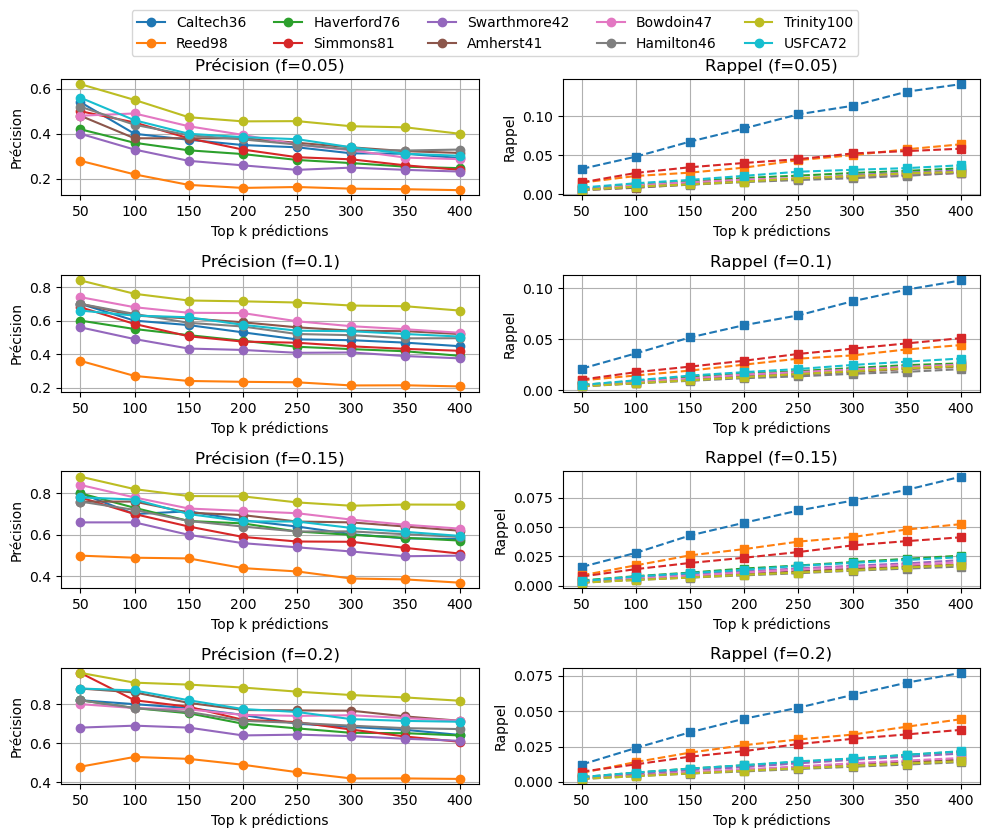

In [80]:
# define the fractions and the figures 
fractions = [0.05, 0.1, 0.15, 0.2]
fig, axes = plt.subplots(len(fractions), 2, figsize=(10, 2 * len(fractions)))

all_results = {}
for name, network in tqdm(test_networks.items(), desc="Processing test_networks", unit="test_networks"):
    for fraction in fractions:
        results = evaluate_link_predictor(network, CommonNeighbors, fraction, verbose=False)
        all_results[(name, fraction)] = results

handles, labels = [], []
for i, fraction in enumerate(fractions):
    ax_prec = axes[i, 0]
    ax_rec = axes[i, 1]
    for name in test_networks.keys():
        if (name, fraction) in all_results:
            results = all_results[(name, fraction)]
            ks = [r[0] for r in results]
            precisions = [r[2] for r in results]
            recalls = [r[3] for r in results]

            line_prec, = ax_prec.plot(ks, precisions, marker='o', linestyle='-', label=name)
            line_rec, = ax_rec.plot(ks, recalls, marker='s', linestyle='--', label=name)

            if name not in labels:
                handles.append(line_prec)
                labels.append(name)

    ax_prec.set_title(f"Précision (f={fraction})")
    ax_prec.set_xlabel("Top k prédictions")
    ax_prec.set_ylabel("Précision")
    ax_prec.grid(True)

    ax_rec.set_title(f"Rappel (f={fraction})")
    ax_rec.set_xlabel("Top k prédictions")
    ax_rec.set_ylabel("Rappel")
    ax_rec.grid(True)

fig.legend(handles, labels, loc='upper center', ncol=len(labels)//2, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


Processing test_networks: 100%|██████████| 10/10 [08:41<00:00, 52.18s/test_networks]


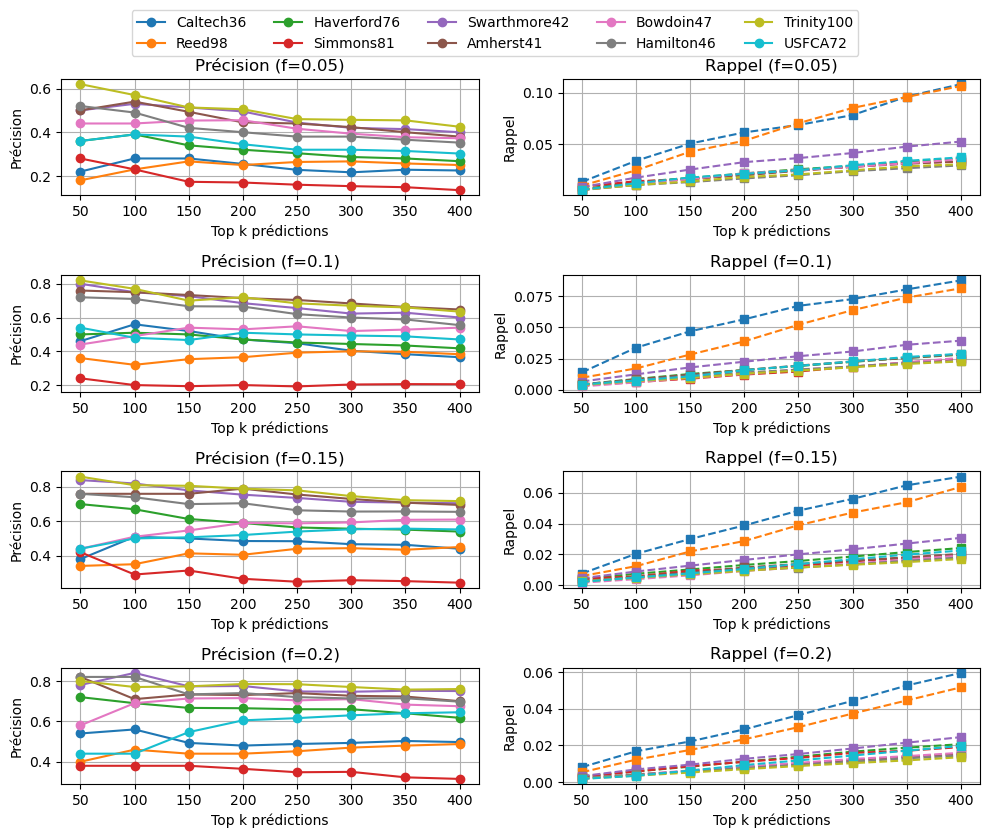

In [81]:
# define the fractions and the figures 
fractions = [0.05, 0.1, 0.15, 0.2]
fig, axes = plt.subplots(len(fractions), 2, figsize=(10, 2 * len(fractions)))

all_results = {}
for name, network in tqdm(test_networks.items(), desc="Processing test_networks", unit="test_networks"):
    for fraction in fractions:
        results = evaluate_link_predictor(network, Jaccard, fraction, verbose=False)
        all_results[(name, fraction)] = results

handles, labels = [], []
for i, fraction in enumerate(fractions):
    ax_prec = axes[i, 0]
    ax_rec = axes[i, 1]
    for name in test_networks.keys():
        if (name, fraction) in all_results:
            results = all_results[(name, fraction)]
            ks = [r[0] for r in results]
            precisions = [r[2] for r in results]
            recalls = [r[3] for r in results]

            line_prec, = ax_prec.plot(ks, precisions, marker='o', linestyle='-', label=name)
            line_rec, = ax_rec.plot(ks, recalls, marker='s', linestyle='--', label=name)

            if name not in labels:
                handles.append(line_prec)
                labels.append(name)

    ax_prec.set_title(f"Précision (f={fraction})")
    ax_prec.set_xlabel("Top k prédictions")
    ax_prec.set_ylabel("Précision")
    ax_prec.grid(True)

    ax_rec.set_title(f"Rappel (f={fraction})")
    ax_rec.set_xlabel("Top k prédictions")
    ax_rec.set_ylabel("Rappel")
    ax_rec.grid(True)

fig.legend(handles, labels, loc='upper center', ncol=len(labels)//2, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


Processing test_networks: 100%|██████████| 10/10 [12:11<00:00, 73.13s/test_networks] 


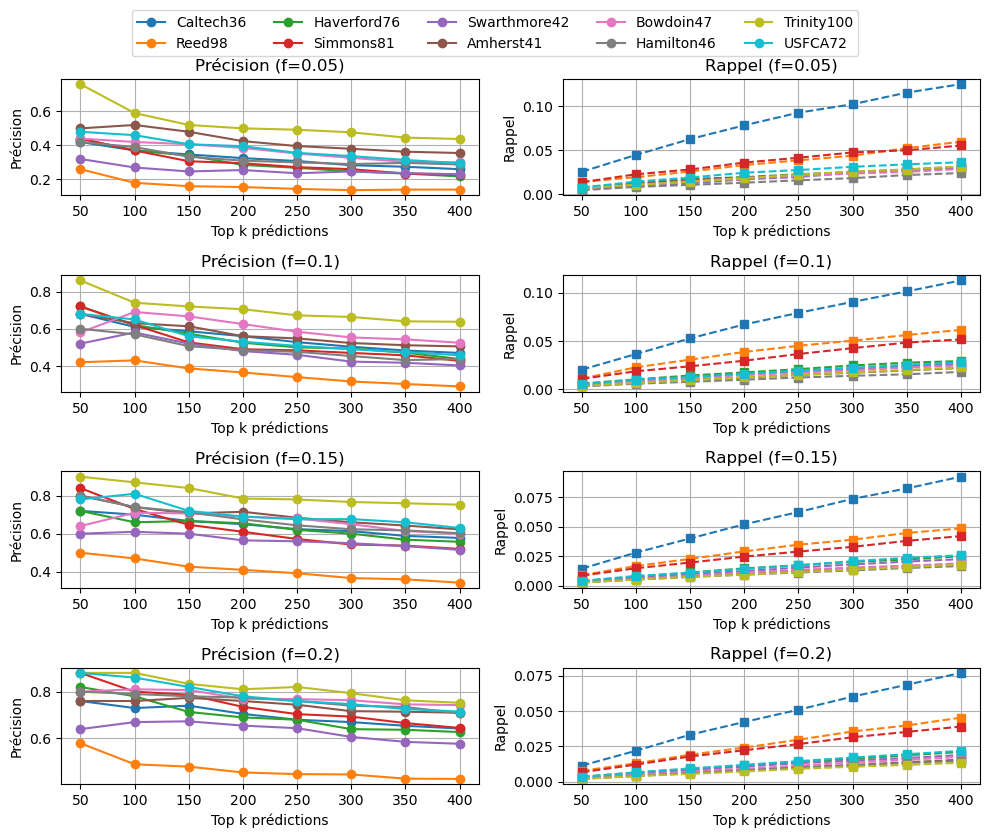

In [82]:
# define the fractions and the figures 
fractions = [0.05, 0.1, 0.15, 0.2]
fig, axes = plt.subplots(len(fractions), 2, figsize=(10, 2 * len(fractions)))

all_results = {}
for name, network in tqdm(test_networks.items(), desc="Processing test_networks", unit="test_networks"):
    for fraction in fractions:
        results = evaluate_link_predictor(network, AdamicAdar, fraction, verbose=False)
        all_results[(name, fraction)] = results

handles, labels = [], []
for i, fraction in enumerate(fractions):
    ax_prec = axes[i, 0]
    ax_rec = axes[i, 1]
    for name in test_networks.keys():
        if (name, fraction) in all_results:
            results = all_results[(name, fraction)]
            ks = [r[0] for r in results]
            precisions = [r[2] for r in results]
            recalls = [r[3] for r in results]

            line_prec, = ax_prec.plot(ks, precisions, marker='o', linestyle='-', label=name)
            line_rec, = ax_rec.plot(ks, recalls, marker='s', linestyle='--', label=name)

            if name not in labels:
                handles.append(line_prec)
                labels.append(name)

    ax_prec.set_title(f"Précision (f={fraction})")
    ax_prec.set_xlabel("Top k prédictions")
    ax_prec.set_ylabel("Précision")
    ax_prec.grid(True)

    ax_rec.set_title(f"Rappel (f={fraction})")
    ax_rec.set_xlabel("Top k prédictions")
    ax_rec.set_ylabel("Rappel")
    ax_rec.grid(True)

fig.legend(handles, labels, loc='upper center', ncol=len(labels)//2, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


# 4. Find missing labels with the label propagation algorithms

In this question we expect you will compute the link prediction algorithms on a large set of graphs (> 10).

In [85]:
# necessary imports 
import torch
import torch.nn as nn
import torch.nn.functional as F

In [119]:
def LPA(network, label_key, unlabelled_nodes, max_iter=10, tol=1e-6):
    n_changes = float('inf')
    iteration = 0
    while n_changes > tol and iteration < max_iter:
        n_changes = 0
        for node in unlabelled_nodes:
            neighbors = list(network.neighbors(node))
            labels = [network.nodes[neighbor][label_key] 
                     for neighbor in neighbors 
                     if network.nodes[neighbor].get(label_key) is not None]
            if len(labels) > 0:
                labels = torch.tensor(labels)
                new_label = torch.mode(labels)[0].item()
                old_label = network.nodes[node].get(label_key)

                if old_label != new_label:
                    network.nodes[node][label_key] = new_label
                    n_changes += 1
        iteration += 1
    return network

In [116]:
# define the remove function
def remove_label(network, label, fraction):
    network_copy = network.copy()
    selected_nodes = random.sample(list(network_copy.nodes()), k=int(fraction * len(list(network_copy.nodes()))))
    for node in selected_nodes:
        network_copy.nodes[node][label] = None
    return network_copy, label, selected_nodes

# define the accuracy score function
def accuracy_score(network_y, network_y_chapo, label):
    nodes_y = list(network_y.nodes())
    nodes_y_chapo = list(network_y_chapo.nodes())

    correct_predictions = 0
    for y, y_chapo in zip(nodes_y, nodes_y_chapo):
        if network_y.nodes[y].get(label) == network_y_chapo.nodes[y_chapo].get(label):
            correct_predictions += 1
    
    size = len(nodes_y)
    if size == 0:
        return 0
    return correct_predictions / size


# define the mae score function
def mae_score(network_y, network_y_chapo, label):
    nodes_y = list(network_y.nodes())
    nodes_y_chapo = list(network_y_chapo.nodes())

    total_error = 0
    for y, y_chapo in zip(nodes_y, nodes_y_chapo):
        label_y = network_y.nodes[y].get(label)
        label_y_chapo = network_y_chapo.nodes[y_chapo].get(label)
        
        if label_y is not None and label_y_chapo is not None:
            total_error += abs(label_y - label_y_chapo)
    
    size = len(nodes_y)
    if size == 0:
        return 0
    return total_error / size

In [121]:
# The MIT network has already been charged
# Mit = nx.read_gml("data/MIT8.gml")

# define a dataframe to store the results
results_acc = pd.DataFrame(columns=['Attribute', '10% removed', '20% removed', '30% removed'])
results_mae = pd.DataFrame(columns=['Attribute', '10% removed', '20% removed', '30% removed'])

results_dataframes = [results_acc, results_mae]
Attributes = ['major_index', 'dorm', 'gender']

# Fill the dataframe 
for attr in Attributes:
    mit_10_percent = remove_label(Mit, attr, 0.10)
    mit_20_percent = remove_label(Mit, attr, 0.20)
    mit_30_percent = remove_label(Mit, attr, 0.30)
    print(f"The label have been remove for the attr: {attr}")

    mit_10_percent_reconstituted = LPA(mit_10_percent[0], mit_10_percent[1], mit_10_percent[2])
    mit_20_percent_reconstituted = LPA(mit_20_percent[0], mit_20_percent[1], mit_20_percent[2])
    mit_30_percent_reconstituted = LPA(mit_30_percent[0], mit_30_percent[1], mit_30_percent[2])
    print(f"The LPA algorithm has been computed for the attr: {attr}")

    line_acc = pd.DataFrame(
        {
            'Attribute': attr, 
            '10% removed': accuracy_score(Mit, mit_10_percent_reconstituted, attr), 
            '20% removed': accuracy_score(Mit, mit_20_percent_reconstituted, attr), 
            '30% removed': accuracy_score(Mit, mit_30_percent_reconstituted, attr), 
        },
        index=[0]
    )     

    line_mae = pd.DataFrame(
        {
            'Attribute': attr, 
            '10% removed': mae_score(Mit, mit_10_percent_reconstituted, attr), 
            '20% removed': mae_score(Mit, mit_20_percent_reconstituted, attr), 
            '30% removed': mae_score(Mit, mit_30_percent_reconstituted, attr), 
        },
        index=[0]
    )     
    results_acc = pd.concat([results_acc, line_acc], ignore_index=True)   
    results_mae = pd.concat([results_mae, line_mae], ignore_index=True)   
    print(f"The results have been stored into dataframes for the attr: {attr}\n")

print(results_acc)
print('\n')
print(results_mae)

The label have been remove for the attr: major_index
The LPA algorithm has been computed for the attr: major_index
The results have been stored into dataframes for the attr: major_index



C:\Users\Rémi\AppData\Local\Temp\ipykernel_7064\2498324861.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_acc = pd.concat([results_acc, line_acc], ignore_index=True)
C:\Users\Rémi\AppData\Local\Temp\ipykernel_7064\2498324861.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_mae = pd.concat([results_mae, line_mae], ignore_index=True)


The label have been remove for the attr: dorm
The LPA algorithm has been computed for the attr: dorm
The results have been stored into dataframes for the attr: dorm

The label have been remove for the attr: gender
The LPA algorithm has been computed for the attr: gender
The results have been stored into dataframes for the attr: gender

     Attribute  10% removed  20% removed  30% removed
0  major_index     0.926398     0.848292     0.766925
1         dorm     0.960093     0.901863     0.816925
2       gender     0.961025     0.926242     0.879969


     Attribute  10% removed  20% removed  30% removed
0  major_index     0.541925     1.112888     1.670652
1         dorm     6.888820    19.548602    39.801863
2       gender     0.045031     0.083075     0.139441


# 5. Communities detection with the FB100 datasets

Formulate a research question about group formation among students in the FB100 dataset. To validate your hypothesis, use only a few universities and a community detection algorithm of your choice to extract the different groups of students.

Hypothesis: "The main factor of community formation in US universities is the students' major".

In [122]:
# let's use the 3 universities already charged above : 

# load the networks
# Caltech = nx.read_gml("data/Caltech36.gml")
# Mit = nx.read_gml("data/MIT8.gml")
# Johns_Hopkins = nx.read_gml("data/Johns Hopkins55.gml")

titles = ["MIT", "Johns_Hopkins", "Caltech"]
networks_exemples = [Mit, Johns_Hopkins, Caltech]